## IMDB Dataset - binary classification of movie reviews
A set of 50,000 highly polarized reviews from the Internet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews.

IMDB dataset comes packaged with Keras. It has already been preprocessed: the reviews (sequences of words) have been turned into sequences of integers(ranks based on frequence), where each integer stands for a specific word in a dictionary.

### 1. Loading the dataset

In [2]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"

In [3]:
import numpy as np
from keras.datasets import imdb
from keras import models
from keras import layers
import matplotlib.pyplot as plt

In [4]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

* The argument **num_words=10000** means you’ll only keep the top 10,000 most frequently
occurring words in the training data. Rare words will be discarded. This allows
you to work with vector data of manageable size.
* The variables train_data and test_data are lists of reviews; each review is a list of
word indices (encoding a sequence of words). train_labels and test_labels are
lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:

In [9]:
len(train_data[0])

218

The reviews are already preprocessed. Instead of words, we have ranks of the words based on frequency.

In [10]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [11]:
train_labels[0]

1

Because you’re restricting yourself to the top 10,000 most frequent words, no word
index will exceed 10,000:

In [13]:
# List comprehension gets the max of each review
# Finally we get the max of those max
max([max(sequence) for sequence in train_data])

9999

In [14]:
# word_index is a dictionary mapping words to an integer index (its rank).
word_index = imdb.get_word_index()

In [15]:
# Rank of 'the' is 1, which means it is most frequent word
word_index['the']

1

In [16]:
# This means 'hate' is the 781st most frequent word
word_index['hate']

781

In [17]:
# Reverses it, mapping integer indices(ranks) to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [18]:
reverse_word_index.get(1)

'the'

In [19]:
# Decode the first review.
# https://docs.quantifiedcode.com/python-anti-patterns/correctness/not_using_get_to_return_a_default_value_from_a_dictionary.html
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

**Note:** The indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”

In [20]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### 2. Data Preparation
* You can’t feed lists of integers into a neural network. You have to turn your lists into tensors.
* We use One-hot encoding to convert the reviews into vectors of 0s and 1s, for instance, turning the sequence [3, 5] into a 10,000-dimensional vector that would be all 0s except for indices 3 and 5, which would be 1s.
* Then you could use as the first layer in your network a Dense layer, capable of handling floating-point vector data.

In [21]:
def vectorize_sequences(sequences, dimension=10000):
    # Creates an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [22]:
x_train = vectorize_sequences(train_data) # Vectorize training data
x_test = vectorize_sequences(test_data) # Vectorize test data

In [23]:
x_train.shape

(25000, 10000)

Vectorizing the labels which is straigth forward

In [25]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### 3. Building the network

In [26]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [27]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [28]:
# create a validation set by setting apart 10,000 samples from the original training data.
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [29]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 9s 601us/step - loss: 0.5063 - acc: 0.7855 - val_loss: 0.3785 - val_acc: 0.8697
Epoch 2/20
15000/15000 [==============================] - 7s 458us/step - loss: 0.2994 - acc: 0.9050 - val_loss: 0.3000 - val_acc: 0.8904
Epoch 3/20
15000/15000 [==============================] - 7s 451us/step - loss: 0.2172 - acc: 0.9287 - val_loss: 0.3088 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 7s 437us/step - loss: 0.1746 - acc: 0.9436 - val_loss: 0.2840 - val_acc: 0.8841
Epoch 5/20
15000/15000 [==============================] - 7s 440us/step - loss: 0.1422 - acc: 0.9543 - val_loss: 0.2857 - val_acc: 0.8860
Epoch 6/20
15000/15000 [==============================] - 6s 431us/step - loss: 0.1147 - acc: 0.9652 - val_loss: 0.3111 - val_acc: 0.8786
Epoch 7/20
15000/15000 [==============================] - 7s 450us/step - loss: 0.0975 - acc: 0.9710 - val_loss: 0.3134 - 

**Note:** The call to model.fit() returns a History object. This object has a member history, which is a dictionary containing data about everything that happened during training. Let’s look at it:

In [30]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

### 4. Plot train and validation loss

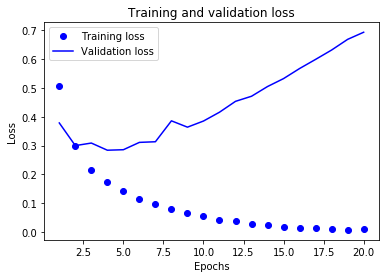

In [31]:
train_loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, train_loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 5. Plot train and validation accuracy

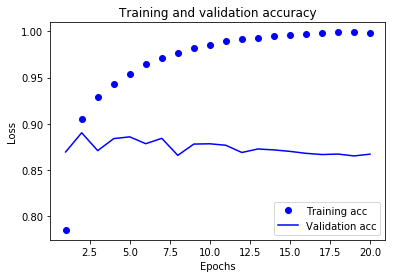

In [32]:
train_acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

As you can see, the training loss decreases with every epoch, and the training accuracy increases with every epoch. That’s what you would expect when running gradientdescent optimization—the quantity you’re trying to minimize should be less with every iteration. But that isn’t the case for the validation loss and accuracy: they seem to peak at the fourth epoch. This is is **overfitting**: after the second epoch, you’re overoptimizing on the training data, and you end up learning representations that are specific to the training data and don’t generalize to data outside of the training set.

Let’s train a new network from scratch for four epochs and then evaluate it on the
test data.

In [33]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 8s 337us/step - loss: 0.4736 - acc: 0.8216
Epoch 2/4
25000/25000 [==============================] - 7s 297us/step - loss: 0.2671 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 7s 289us/step - loss: 0.2031 - acc: 0.9286
Epoch 4/4
25000/25000 [==============================] - 11s 425us/step


In [34]:
results

[0.3118891020011902, 0.87636]

Thus we get 88.5% accuracy with a fairly naive approach.

### 6. Prediction on test data
After having trained a network, you’ll want to use it in a practical setting. You can generate the likelihood of reviews being positive by using the predict method:

In [35]:
model.predict(x_test)

array([[0.16090992],
       [0.9998265 ],
       [0.40527946],
       ...,
       [0.0822554 ],
       [0.04901712],
       [0.4529437 ]], dtype=float32)

As you can see, the network is confident for some samples (0.99 or more, or 0.003 or less) but less confident for others (0.44, etc.)

### 7. Assignmets:
1. Try only 1 hidden layer with 16 units
2. Try 3 hidden layers (each with 16 units)
3. Try 2 hidden layers each with 32 units
4. Try the same above architecture and replace relu activation by tanh activation in both the hidden layers

### 7. With only 1 hidden layer and 16 units.

In [78]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

In [79]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [80]:
# create a validation set by setting apart 10,000 samples from the original training data.
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [81]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 7s 489us/step - loss: 0.5055 - acc: 0.8007 - val_loss: 0.3929 - val_acc: 0.8706
Epoch 2/20
15000/15000 [==============================] - 7s 434us/step - loss: 0.3207 - acc: 0.9024 - val_loss: 0.3221 - val_acc: 0.8826
Epoch 3/20
15000/15000 [==============================] - 7s 438us/step - loss: 0.2480 - acc: 0.9217 - val_loss: 0.2930 - val_acc: 0.8878
Epoch 4/20
15000/15000 [==============================] - 6s 424us/step - loss: 0.2037 - acc: 0.9359 - val_loss: 0.2794 - val_acc: 0.8908
Epoch 5/20
15000/15000 [==============================] - 7s 449us/step - loss: 0.1726 - acc: 0.9484 - val_loss: 0.2736 - val_acc: 0.8903
Epoch 6/20
15000/15000 [==============================] - 7s 461us/step - loss: 0.1485 - acc: 0.9570 - val_loss: 0.2745 - val_acc: 0.8894
Epoch 7/20
15000/15000 [==============================] - 7s 460us/step - loss: 0.1294 - acc: 0.9636 - val_loss: 0.2805 - 

In [82]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

### 8. Plot train and validation loss

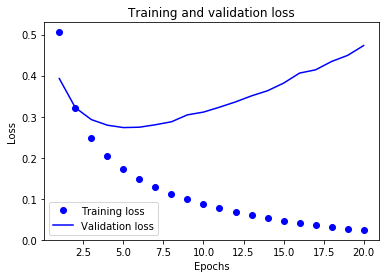

In [83]:
train_loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, train_loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 9. Plot train and validation accuracy

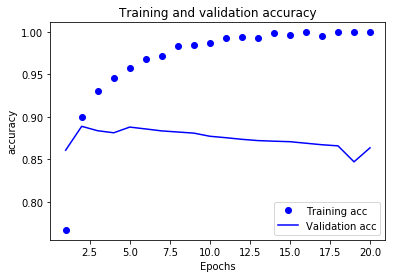

In [93]:
train_acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

As you can see the training loss is decreasing gradually and the validation loss is increasing from the 3rd epoch.
Similarly the training accuracy is increasing and the validation accuracy is decreasing from the 3rd epoch.
Therefore this is a case of overfitting.

### 10. With 3 Hidden layers each with 16 units.

In [85]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [86]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [87]:
# create a validation set by setting apart 10,000 samples from the original training data.
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [88]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 8s 523us/step - loss: 0.5310 - acc: 0.7668 - val_loss: 0.3929 - val_acc: 0.8607
Epoch 2/20
15000/15000 [==============================] - 7s 444us/step - loss: 0.3054 - acc: 0.8999 - val_loss: 0.2987 - val_acc: 0.8888
Epoch 3/20
15000/15000 [==============================] - 7s 435us/step - loss: 0.2172 - acc: 0.9303 - val_loss: 0.2963 - val_acc: 0.8836
Epoch 4/20
15000/15000 [==============================] - 7s 440us/step - loss: 0.1655 - acc: 0.9463 - val_loss: 0.2999 - val_acc: 0.8812
Epoch 5/20
15000/15000 [==============================] - 7s 434us/step - loss: 0.1349 - acc: 0.9571 - val_loss: 0.2895 - val_acc: 0.8879
Epoch 6/20
15000/15000 [==============================] - 7s 434us/step - loss: 0.1063 - acc: 0.9683 - val_loss: 0.3060 - val_acc: 0.8857
Epoch 7/20
15000/15000 [==============================] - 7s 442us/step - loss: 0.0913 - acc: 0.9719 - val_loss: 0.3273 - 

In [89]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

### 11. Plot train and validation loss

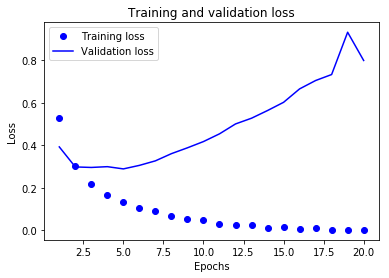

In [90]:
train_loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, train_loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 12. Plot train and validation accuracy

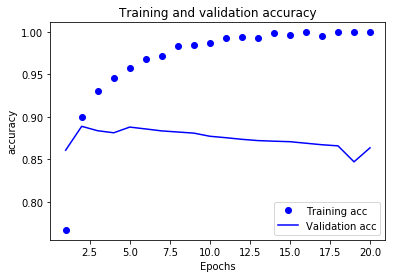

In [92]:
train_acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Similarly this model also overfits by overoptimizing the training data and fails to generalize the test data.

### 13. With 2 Hidden layer each with 32 units.

In [94]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [95]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [96]:
# create a validation set by setting apart 10,000 samples from the original training data.
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [97]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 9s 583us/step - loss: 0.4901 - acc: 0.7879 - val_loss: 0.3455 - val_acc: 0.8805
Epoch 2/20
15000/15000 [==============================] - 7s 468us/step - loss: 0.2726 - acc: 0.9061 - val_loss: 0.2841 - val_acc: 0.8906
Epoch 3/20
15000/15000 [==============================] - 8s 504us/step - loss: 0.1963 - acc: 0.9322 - val_loss: 0.3523 - val_acc: 0.8607
Epoch 4/20
15000/15000 [==============================] - 7s 475us/step - loss: 0.1515 - acc: 0.9482 - val_loss: 0.2878 - val_acc: 0.8866
Epoch 5/20
15000/15000 [==============================] - 7s 468us/step - loss: 0.1181 - acc: 0.9605 - val_loss: 0.3370 - val_acc: 0.8719
Epoch 6/20
15000/15000 [==============================] - 7s 485us/step - loss: 0.0949 - acc: 0.9695 - val_loss: 0.3713 - val_acc: 0.8689
Epoch 7/20
15000/15000 [==============================] - 7s 467us/step - loss: 0.0721 - acc: 0.9771 - val_loss: 0.3563 - 

In [98]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

### 14. Plot train and validation loss

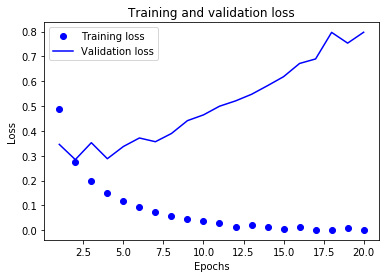

In [99]:
train_loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, train_loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 15. Plot train and validation accuracy

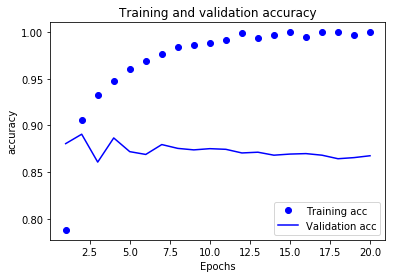

In [100]:
train_acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### 16. With 2 Hidden layers each 16 units and activation function as tanh.

In [101]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

In [102]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [103]:
# create a validation set by setting apart 10,000 samples from the original training data.
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [104]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 8s 515us/step - loss: 0.4661 - acc: 0.8041 - val_loss: 0.3419 - val_acc: 0.8793
Epoch 2/20
15000/15000 [==============================] - 7s 460us/step - loss: 0.2643 - acc: 0.9081 - val_loss: 0.2879 - val_acc: 0.8865
Epoch 3/20
15000/15000 [==============================] - 7s 444us/step - loss: 0.1880 - acc: 0.9351 - val_loss: 0.2905 - val_acc: 0.8819
Epoch 4/20
15000/15000 [==============================] - 7s 455us/step - loss: 0.1438 - acc: 0.9491 - val_loss: 0.2858 - val_acc: 0.8855
Epoch 5/20
15000/15000 [==============================] - 7s 440us/step - loss: 0.1107 - acc: 0.9623 - val_loss: 0.3167 - val_acc: 0.8807
Epoch 6/20
15000/15000 [==============================] - 7s 455us/step - loss: 0.0860 - acc: 0.9722 - val_loss: 0.3536 - val_acc: 0.8782
Epoch 7/20
15000/15000 [==============================] - 7s 448us/step - loss: 0.0694 - acc: 0.9783 - val_loss: 0.3861 - 

In [105]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

### 17. Plot train and validation loss

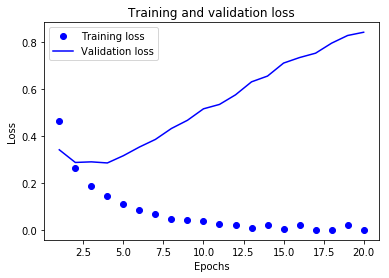

In [106]:
train_loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, train_loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 18. Plot train and validation accuracy

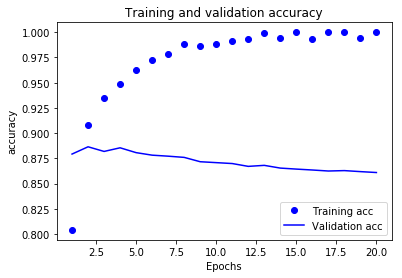

In [107]:
train_acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()